- ``cv2.boundingRect()`` returns the minimal bounding RECTANGLE enclosing all the points of the CONTOURS

- ``cv2.minAreaRect()`` returns the minimal rotated (if necessary) Rectangle enclosing all the points of the CONTOURS

- ``cv2.boxPoints()`` returns the four vertices of the rotated rectangle

- ``cv2.minEnclosingCircle()`` returns the minimal circle (it returns the center and radius) enclosing all the points of the CONTOURS

- ``cv2.fitEllipse()`` returns the ellipse that fit (with minimum least square error) all the point of CONTOURS

- ``cv2.approxPolyDP()`` returns a contour approximation of the given contour using __Douglas-Peucker Algorithm__

In [17]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

In [18]:
def extreme_points(contour):

    """Returns extreme points of the contours"""

    index_min_x = contour[:, :, 0].argmin()
    index_min_y = contour[:, :, 1].argmin()
    index_max_x = contour[:, :, 0].argmax()
    index_max_y = contour[:, :, 1].argmax()

    extreme_left = tuple(contour[index_min_x][0])
    extreme_right = tuple(contour[index_max_x][0])
    extreme_top = tuple(contour[index_min_y][0])
    extreme_bottom = tuple(contour[index_max_y][0])

    return extreme_left, extreme_right, extreme_top, extreme_bottom

In [19]:
def array_to_tuple(arr):

    return tuple(arr.reshape(1, -1)[0])

In [20]:
def draw_contour_points(img, counts, color):

    """Draw all points from a list of contours"""

    for count in counts:
        squeeze = np.squeeze(count)

        for p in squeeze:
            pp = array_to_tuple(p)
            cv2.circle(img, pp, 10, color, -1)
    
    return img


def draw_contour_outline(img, counts, color, thickness=-1):

    for count in counts:
        cv2.drawContours(img, [count], 0, color, thickness)

In [21]:
def img_plt(color_img, title, pos):

    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(3, 2, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis("off")

fig = plt.figure(figsize=(12, 8))
plt.rcParams['figure.facecolor']  = 'silver'

<Figure size 864x576 with 0 Axes>

In [22]:
#Loading the image and converting it to GrayScale:
image = cv2.imread("images/shape_features.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Thresholding to get a binary image:
ret, thresh = cv2.threshold(gray_image, 50, 255, cv2.THRESH_BINARY)

In [23]:
# Finding Contours using the thresholded image:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Show the number of detected contours:
print("detected contours: '{}' ".format(len(contours)))

detected contours: '1' 


In [24]:
# Creating copy of the original image to perform the visualization of each operation:
boundingRect_image = image.copy()
minAreaRect_image = image.copy()
fitEllipse_image = image.copy()
minEnclosingCircle_image = image.copy()
approxPolyDP_image = image.copy()

``cv2.boundingRect()``


In [25]:
x, y, w, h = cv2.boundingRect(contours[0])
cv2.rectangle(boundingRect_image, (x, y), (x + w, y + h), (0, 255, 0), 5)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

``cv2.minAreaRect():``

In [26]:
rotated_rect = cv2.minAreaRect(contours[0])
box = cv2.boxPoints(rotated_rect)
box = np.int0(box)
cv2.polylines(minAreaRect_image, [box], True, (0, 0, 255), 5)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [27]:
# 3. cv2.minEnclosingCircle():
(x, y), radius = cv2.minEnclosingCircle(contours[0])
center = (int(x), int(y))
radius = int(radius)
cv2.circle(minEnclosingCircle_image, center, radius, (255, 0, 0), 5)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [28]:
# 4. cv2.fitEllipse():
ellipse = cv2.fitEllipse(contours[0])
cv2.ellipse(fitEllipse_image, ellipse, (0, 255, 255), 5)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [29]:
# 5. cv2.approxPolyDP():
epsilon = 0.01 * cv2.arcLength(contours[0], True)
approx = cv2.approxPolyDP(contours[0], epsilon, True)
draw_contour_outline(approxPolyDP_image, [approx], (255, 255, 0), 5)
draw_contour_points(approxPolyDP_image, [approx], (255, 0, 255))

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [30]:
# 6. Detect extreme points of the contour:
left, right, top, bottom = extreme_points(contours[0])
cv2.circle(image, left, 20, (255, 0, 0), -1)
cv2.circle(image, right, 20, (0, 255, 0), -1)
cv2.circle(image, top, 20, (0, 255, 255), -1)
cv2.circle(image, bottom, 20, (0, 0, 255), -1)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

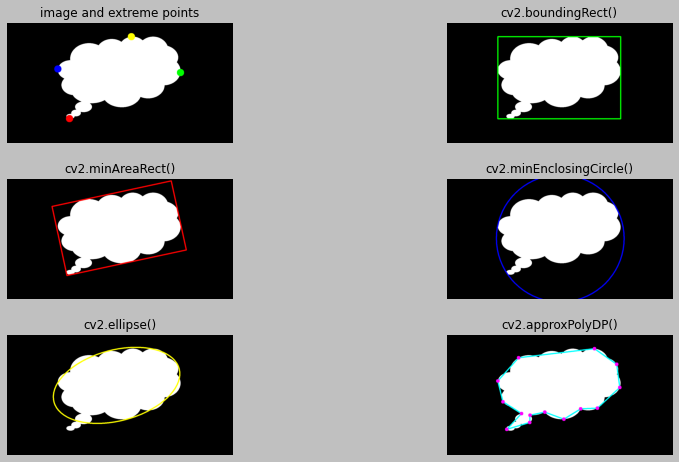

In [31]:
#Plotting the image:
img_plt(image, "image and extreme points", 1)
img_plt(boundingRect_image, "cv2.boundingRect()", 2)
img_plt(minAreaRect_image, "cv2.minAreaRect()", 3)
img_plt(minEnclosingCircle_image, "cv2.minEnclosingCircle()", 4)
img_plt(fitEllipse_image, "cv2.ellipse()", 5)
img_plt(approxPolyDP_image, "cv2.approxPolyDP()", 6)

plt.subplots_adjust(top=3,bottom=1.5, right=2, left=0.2, wspace=0.3, hspace=0.3)
plt.show()